In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as prep
import deeper_autoencoder as d_cae
import datetime

Using TensorFlow backend.


In [2]:
import random

In [3]:
def plot_hist(history, filename):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower left')
    plt.savefig("media/{}.pdf".format(filename))
    plt.show()

In [4]:
def plot_imgs(originals, predictions):    
    n = 5
    fig, ax = plt.subplots(2, n)
    for i in range(n):
        # display original
        # ax[0].set_title("Original Images")
        ax[0, i].imshow(originals[i])
        ax[0, i].get_xaxis().set_visible(False)
        ax[0, i].get_yaxis().set_visible(False)

        # display reconstruction
        # ax[1].set_title("Reconstructed Images")
        ax[1, i].imshow(predictions[i])
        ax[1, i].get_xaxis().set_visible(False)
        ax[1, i].get_yaxis().set_visible(False)


    plt.tight_layout()
    plt.show()

In [8]:
data_path = "data/locations/experiments_set" 
images_list = os.listdir(data_path)
downscaling_factor = 8

In [6]:
x_train, x_test, _ = prep.obtain_dataset(images_list, data_path)

data/locations/experiments_set
Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


In [5]:
print(x_train[0].shape)
model = d_cae.build_autoencoder(x_train[0].shape)
model.summary()

(144, 256, 3)


ValueError: Unknown loss function:binary-crossentropy

In [15]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=64,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 48s - loss: 0.6503 - val_loss: 0.6296
Epoch 2/300
 - 36s - loss: 0.6170 - val_loss: 0.6081
Epoch 3/300
 - 36s - loss: 0.6062 - val_loss: 0.6043
Epoch 4/300
 - 36s - loss: 0.6031 - val_loss: 0.6016
Epoch 5/300
 - 36s - loss: 0.6015 - val_loss: 0.6008
Epoch 6/300
 - 36s - loss: 0.6002 - val_loss: 0.5995
Epoch 7/300
 - 36s - loss: 0.5991 - val_loss: 0.5997
Epoch 8/300
 - 36s - loss: 0.5987 - val_loss: 0.5978
Epoch 9/300
 - 36s - loss: 0.5977 - val_loss: 0.5978
Epoch 10/300
 - 36s - loss: 0.5972 - val_loss: 0.5970
Epoch 11/300
 - 36s - loss: 0.5980 - val_loss: 0.5968
Epoch 12/300
 - 36s - loss: 0.5967 - val_loss: 0.5964
Epoch 13/300
 - 36s - loss: 0.5962 - val_loss: 0.5962
Epoch 14/300
 - 36s - loss: 0.5959 - val_loss: 0.5957
Epoch 15/300
 - 36s - loss: 0.5957 - val_loss: 0.5956
Epoch 16/300
 - 36s - loss: 0.5954 - val_loss: 0.5953
Epoch 17/300
 - 36s - loss: 0.5953 - val_loss: 0.5952
Epoch 18/300
 - 36s - loss: 0.5952 - val_los

In [17]:
d_cae.save_autoencoder(model, "model/autoencoder_baseline", "model/autoencoder_baseline_w")

Saved model to disk


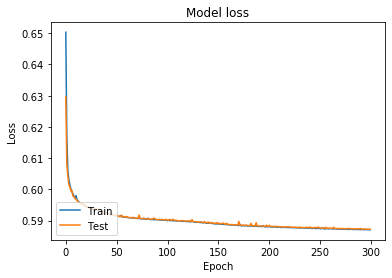

In [18]:
plot_hist(history, "baseline")

In [19]:
_, _, x_predict = prep.obtain_dataset(images_list, data_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


In [34]:
import random

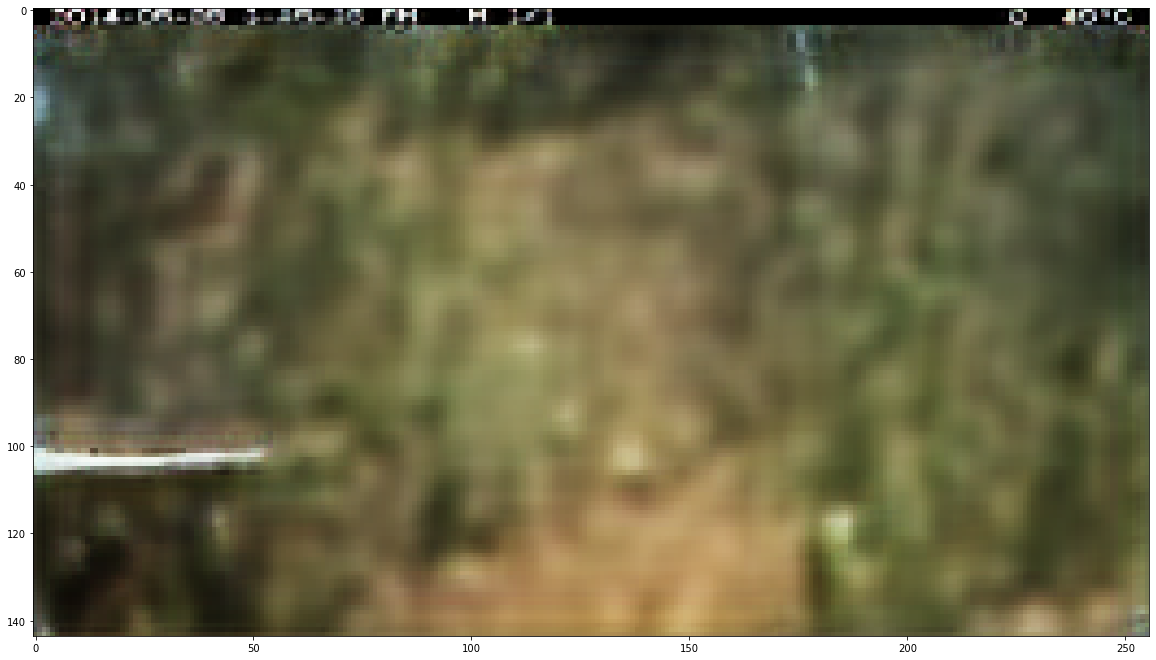

In [78]:
decoded_img = model.predict(np.array([random.choice(x_predict)]))
plt.figure(figsize=(20, 20))
plt.imshow(decoded_img[0])

In [7]:
import deeper_autoencoder_linear as d_cae_linear

In [8]:
print(x_train[0].shape)
model = d_cae_linear.load_autoencoder("model/autoencoder_linear", "model/autoencoder_linear_w")
model.summary()

(144, 256, 3)
Loaded model from disk
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 256, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 128, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 8)        1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 4)         292       
_________________________________________________________________
max_pooling2d_3 (MaxPo

In [8]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=64,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 49s - loss: 0.9596 - val_loss: 0.6548
Epoch 2/300
 - 37s - loss: 0.6403 - val_loss: 0.6337
Epoch 3/300
 - 36s - loss: 0.6311 - val_loss: 0.6256
Epoch 4/300
 - 37s - loss: 0.6205 - val_loss: 0.6158
Epoch 5/300
 - 37s - loss: 0.6148 - val_loss: 0.6131
Epoch 6/300
 - 37s - loss: 0.6104 - val_loss: 0.6072
Epoch 7/300
 - 37s - loss: 0.6067 - val_loss: 0.6055
Epoch 8/300
 - 37s - loss: 0.6052 - val_loss: 0.6042
Epoch 9/300
 - 37s - loss: 0.6040 - val_loss: 0.6032
Epoch 10/300
 - 37s - loss: 0.6032 - val_loss: 0.6026
Epoch 11/300
 - 37s - loss: 0.6027 - val_loss: 0.6021
Epoch 12/300
 - 37s - loss: 0.6022 - val_loss: 0.6016
Epoch 13/300
 - 37s - loss: 0.6017 - val_loss: 0.6012
Epoch 14/300
 - 37s - loss: 0.6014 - val_loss: 0.6009
Epoch 15/300
 - 37s - loss: 0.6011 - val_loss: 0.6007
Epoch 16/300
 - 37s - loss: 0.6008 - val_loss: 0.6004
Epoch 17/300
 - 37s - loss: 0.6005 - val_loss: 0.6002
Epoch 18/300
 - 37s - loss: 0.6003 - val_los

In [9]:
d_cae.save_autoencoder(model, "model/autoencoder_linear", "model/autoencoder_line_w")

Saved model to disk


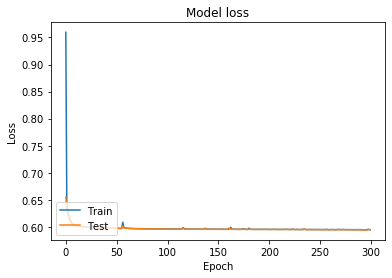

In [10]:
plot_hist(history, "linear")

In [11]:
_, _, x_predict = prep.obtain_dataset(images_list, data_path)

data/locations/experiments_set
Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


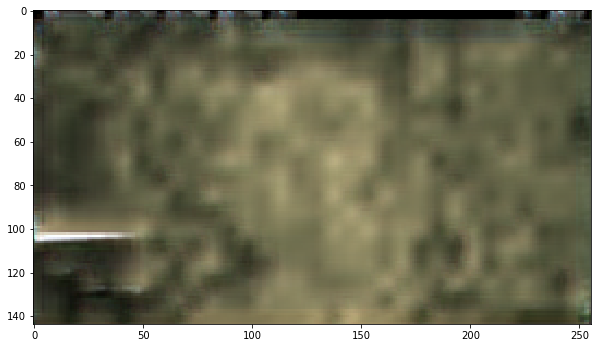

In [27]:
decoded_img = model.predict(np.array([random.choice(x_test)]))
plt.figure(figsize=(10, 10))
plt.imshow(decoded_img[0])

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as prep
import deeper_autoencoder_gray as d_cae_g
import datetime

Using TensorFlow backend.


In [2]:
import random

In [3]:
def plot_hist(history, filename):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower left')
    plt.savefig("media/{}.pdf".format(filename))
    plt.show()

In [4]:
def plot_imgs(originals, predictions):    
    n = 5
    fig, ax = plt.subplots(2, n)
    for i in range(n):
        # display original
        # ax[0].set_title("Original Images")
        ax[0, i].imshow(originals[i])
        ax[0, i].get_xaxis().set_visible(False)
        ax[0, i].get_yaxis().set_visible(False)

        # display reconstruction
        # ax[1].set_title("Reconstructed Images")
        ax[1, i].imshow(predictions[i])
        ax[1, i].get_xaxis().set_visible(False)
        ax[1, i].get_yaxis().set_visible(False)


    plt.tight_layout()
    plt.show()

In [5]:
data_path = "data/locations/experiments_set" 
images_list = os.listdir(data_path)

In [6]:
batch_path = 'experiments_set_g'

In [7]:
x_train, x_test, _ = prep.obtain_dataset(images_list, batch_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


In [8]:
x_train = x_train.reshape([-1, 144, 256, 1])
x_test = x_test.reshape([-1, 144, 256, 1])

In [9]:
print(x_train.shape)
model = d_cae_g_l.build_autoencoder(x_train.shape)
model.summary()

(1800, 144, 256, 1)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 256, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 128, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 8)        1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 4)         292       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18,

In [10]:
x_train.shape

(1800, 144, 256, 1)

In [11]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=64,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 41s - loss: 0.8427 - val_loss: 0.6655
Epoch 2/300
 - 29s - loss: 0.6526 - val_loss: 0.6483
Epoch 3/300
 - 29s - loss: 0.6448 - val_loss: 0.6388
Epoch 4/300
 - 29s - loss: 0.6341 - val_loss: 0.6304
Epoch 5/300
 - 29s - loss: 0.6291 - val_loss: 0.6277
Epoch 6/300
 - 30s - loss: 0.6268 - val_loss: 0.6260
Epoch 7/300
 - 30s - loss: 0.6252 - val_loss: 0.6247
Epoch 8/300
 - 29s - loss: 0.6239 - val_loss: 0.6233
Epoch 9/300
 - 29s - loss: 0.6228 - val_loss: 0.6223
Epoch 10/300
 - 29s - loss: 0.6218 - val_loss: 0.6213
Epoch 11/300
 - 29s - loss: 0.6208 - val_loss: 0.6202
Epoch 12/300
 - 30s - loss: 0.6197 - val_loss: 0.6193
Epoch 13/300
 - 29s - loss: 0.6187 - val_loss: 0.6183
Epoch 14/300
 - 29s - loss: 0.6179 - val_loss: 0.6177
Epoch 15/300
 - 29s - loss: 0.6174 - val_loss: 0.6172
Epoch 16/300
 - 29s - loss: 0.6169 - val_loss: 0.6168
Epoch 17/300
 - 29s - loss: 0.6165 - val_loss: 0.6165
Epoch 18/300
 - 29s - loss: 0.6162 - val_los

In [13]:
d_cae_g_l.save_autoencoder(model, "model/autoencoder_gray", "model/autoencoder_gray_w")

Saved model to disk


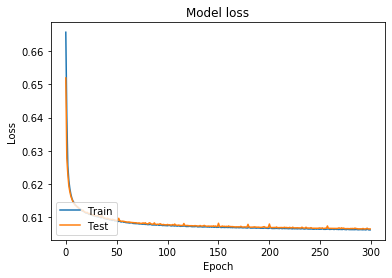

In [14]:
plot_hist(history, "plot_gray")

In [15]:
_, _, x_predict = prep.obtain_dataset(images_list, batch_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


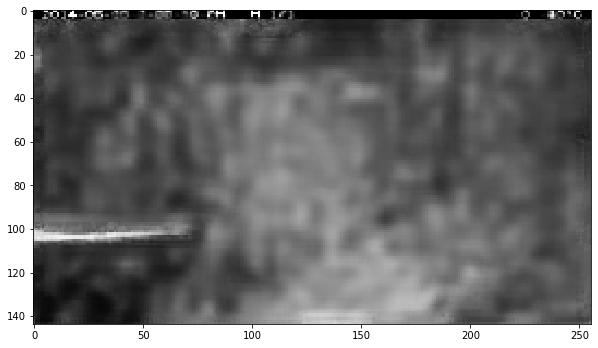

In [24]:
decoded_img = model.predict(np.array([random.choice(x_test)]))
plt.figure(figsize=(10, 10))

plt.imshow(decoded_img[0].reshape(144, 256), cmap='gray')

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as prep
import deeper_autoencoder_gray_linear as d_cae_g_l
import datetime

Using TensorFlow backend.


In [2]:
import random

In [3]:
def plot_hist(history, filename):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower left')
    plt.savefig("media/{}.pdf".format(filename))
    plt.show()

In [4]:
def plot_imgs(originals, predictions):    
    n = 5
    fig, ax = plt.subplots(2, n)
    for i in range(n):
        # display original
        # ax[0].set_title("Original Images")
        ax[0, i].imshow(originals[i])
        ax[0, i].get_xaxis().set_visible(False)
        ax[0, i].get_yaxis().set_visible(False)

        # display reconstruction
        # ax[1].set_title("Reconstructed Images")
        ax[1, i].imshow(predictions[i])
        ax[1, i].get_xaxis().set_visible(False)
        ax[1, i].get_yaxis().set_visible(False)


    plt.tight_layout()
    plt.show()

In [5]:
data_path = "data/locations/experiments_set" 
images_list = os.listdir(data_path)

In [6]:
batch_path = 'experiments_set_g'

In [7]:
x_train, x_test, _ = prep.obtain_dataset(images_list, batch_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


In [8]:
x_train = x_train.reshape([-1, 144, 256, 1])
x_test = x_test.reshape([-1, 144, 256, 1])

In [9]:
print(x_train.shape)
model = d_cae_g.build_autoencoder(x_train.shape)
model.summary()

(1800, 144, 256, 1)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 256, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 128, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 8)        1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 4)         292       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18,

In [10]:
x_train.shape

(1800, 144, 256, 1)

In [11]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=64,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 41s - loss: 0.6657 - val_loss: 0.6519
Epoch 2/300
 - 29s - loss: 0.6403 - val_loss: 0.6277
Epoch 3/300
 - 29s - loss: 0.6254 - val_loss: 0.6229
Epoch 4/300
 - 29s - loss: 0.6210 - val_loss: 0.6193
Epoch 5/300
 - 29s - loss: 0.6185 - val_loss: 0.6176
Epoch 6/300
 - 29s - loss: 0.6169 - val_loss: 0.6162
Epoch 7/300
 - 29s - loss: 0.6156 - val_loss: 0.6155
Epoch 8/300
 - 29s - loss: 0.6148 - val_loss: 0.6146
Epoch 9/300
 - 29s - loss: 0.6144 - val_loss: 0.6141
Epoch 10/300
 - 29s - loss: 0.6138 - val_loss: 0.6137
Epoch 11/300
 - 29s - loss: 0.6135 - val_loss: 0.6134
Epoch 12/300
 - 29s - loss: 0.6132 - val_loss: 0.6131
Epoch 13/300
 - 29s - loss: 0.6129 - val_loss: 0.6129
Epoch 14/300
 - 29s - loss: 0.6126 - val_loss: 0.6127
Epoch 15/300
 - 29s - loss: 0.6123 - val_loss: 0.6124
Epoch 16/300
 - 29s - loss: 0.6123 - val_loss: 0.6122
Epoch 17/300
 - 29s - loss: 0.6119 - val_loss: 0.6119
Epoch 18/300
 - 29s - loss: 0.6118 - val_los

In [13]:
d_cae_g_l.save_autoencoder(model, "model/autoencoder_gray_linear", "model/autoencoder_gray_linear_w")

Saved model to disk


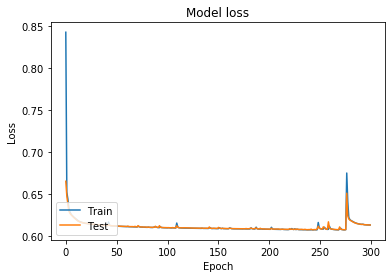

In [14]:
plot_hist(history, "plot_gray_linear")

In [15]:
_, _, x_predict = prep.obtain_dataset(images_list, batch_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


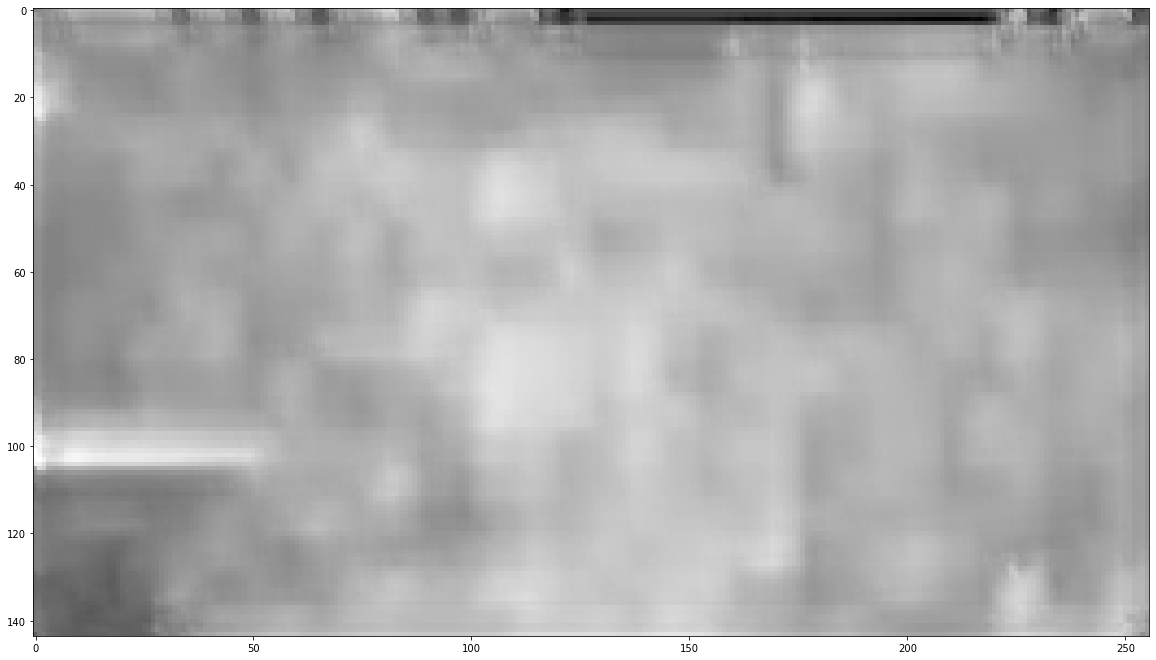

In [17]:
decoded_img = model.predict(np.array([random.choice(x_test)]))
plt.figure(figsize=(20, 20))

plt.imshow(decoded_img[0].reshape(144, 256), cmap='gray')

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as prep
import deeper_autoencoder_trans as d_cae_t
import datetime

Using TensorFlow backend.


In [2]:
import random

In [3]:
def plot_hist(history, filename):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower left')
    plt.savefig("media/{}.pdf".format(filename))
    plt.show()

In [4]:
def plot_imgs(originals, predictions):    
    n = 5
    fig, ax = plt.subplots(2, n)
    for i in range(n):
        # display original
        # ax[0].set_title("Original Images")
        ax[0, i].imshow(originals[i])
        ax[0, i].get_xaxis().set_visible(False)
        ax[0, i].get_yaxis().set_visible(False)

        # display reconstruction
        # ax[1].set_title("Reconstructed Images")
        ax[1, i].imshow(predictions[i])
        ax[1, i].get_xaxis().set_visible(False)
        ax[1, i].get_yaxis().set_visible(False)


    plt.tight_layout()
    plt.show()

In [5]:
data_path = "data/locations/experiments_set" 
images_list = os.listdir(data_path)
downscaling_factor = 8

In [6]:
x_train, x_test, _ = prep.obtain_dataset(images_list, data_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


In [8]:
print(x_train[0].shape)
model = d_cae_t.build_autoencoder(x_train[0].shape)
model.summary()

(144, 256, 3)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 256, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 128, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 8)        1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 64, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 4)         292       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 32, 4

In [9]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=64,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 39s - loss: 0.6673 - val_loss: 0.6376
Epoch 2/300
 - 30s - loss: 0.6280 - val_loss: 0.6144
Epoch 3/300
 - 30s - loss: 0.6117 - val_loss: 0.6076
Epoch 4/300
 - 30s - loss: 0.6061 - val_loss: 0.6037
Epoch 5/300
 - 30s - loss: 0.6027 - val_loss: 0.6012
Epoch 6/300
 - 30s - loss: 0.6009 - val_loss: 0.6000
Epoch 7/300
 - 30s - loss: 0.5999 - val_loss: 0.5993
Epoch 8/300
 - 30s - loss: 0.5994 - val_loss: 0.5987
Epoch 9/300
 - 30s - loss: 0.5989 - val_loss: 0.5985
Epoch 10/300
 - 30s - loss: 0.5985 - val_loss: 0.5982
Epoch 11/300
 - 30s - loss: 0.5983 - val_loss: 0.5979
Epoch 12/300
 - 30s - loss: 0.5981 - val_loss: 0.5977
Epoch 13/300
 - 30s - loss: 0.5978 - val_loss: 0.5976
Epoch 14/300
 - 30s - loss: 0.5977 - val_loss: 0.5973
Epoch 15/300
 - 30s - loss: 0.5975 - val_loss: 0.5974
Epoch 16/300
 - 30s - loss: 0.5973 - val_loss: 0.5972
Epoch 17/300
 - 30s - loss: 0.5973 - val_loss: 0.5969
Epoch 18/300
 - 30s - loss: 0.5972 - val_los

In [10]:
d_cae_t.save_autoencoder(model, "model/autoencoder_base_t", "model/autoencoder_base_t_w")

Saved model to disk


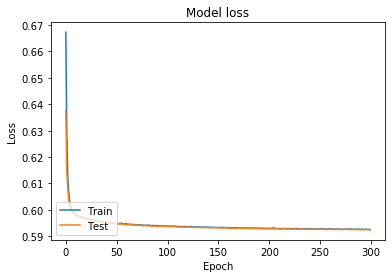

In [11]:
plot_hist(history, "plot_base_t")

In [12]:
_, _, x_predict = prep.obtain_dataset(images_list, data_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


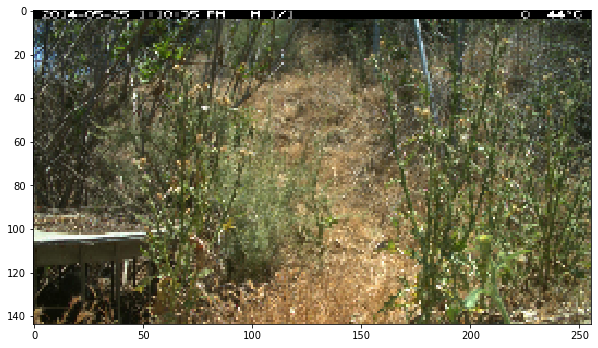

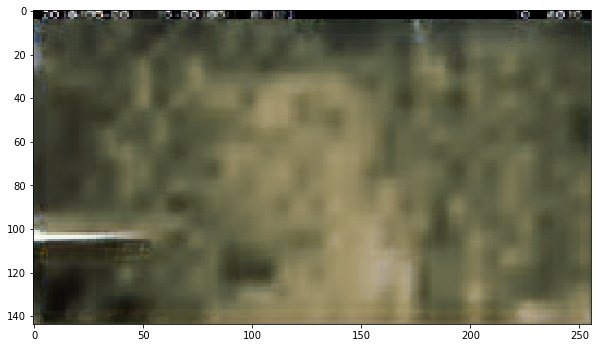

In [67]:
image = random.choice(x_test)
decoded_img = model.predict(np.array([image]))
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.figure(figsize=(10, 10))
plt.imshow(decoded_img[0])

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as prep
import datetime

In [2]:
import random

In [3]:
def plot_hist(history, filename):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.savefig("media/{}.pdf".format(filename))
    plt.show()

In [4]:
def plot_imgs(originals, predictions):    
    n = 5
    fig, ax = plt.subplots(2, n)
    for i in range(n):
        # display original
        # ax[0].set_title("Original Images")
        ax[0, i].imshow(originals[i])
        ax[0, i].get_xaxis().set_visible(False)
        ax[0, i].get_yaxis().set_visible(False)

        # display reconstruction
        # ax[1].set_title("Reconstructed Images")
        ax[1, i].imshow(predictions[i])
        ax[1, i].get_xaxis().set_visible(False)
        ax[1, i].get_yaxis().set_visible(False)


    plt.tight_layout()
    plt.show()

In [5]:
data_path = "data/locations/experiments_set" 
images_list = os.listdir(data_path)
downscaling_factor = 8

In [6]:
x_train, x_test, _ = prep.obtain_dataset(images_list, data_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


In [7]:
import deeper_autoencoder_trans_seven as d_cae_t7
print(x_train[0].shape)
model = d_cae_t7.build_autoencoder(x_train[0].shape)
model.summary()

Using TensorFlow backend.


(144, 256, 3)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 256, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 128, 256)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 128)      295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 32, 6

In [9]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=8,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 251s - loss: 0.6089 - val_loss: 0.5947
Epoch 2/300
 - 248s - loss: 0.5917 - val_loss: 0.5907
Epoch 3/300
 - 248s - loss: 0.5888 - val_loss: 0.5880
Epoch 4/300
 - 248s - loss: 0.5871 - val_loss: 0.5872
Epoch 5/300
 - 248s - loss: 0.5861 - val_loss: 0.5857
Epoch 6/300
 - 248s - loss: 0.5852 - val_loss: 0.5853
Epoch 7/300
 - 248s - loss: 0.5845 - val_loss: 0.5851
Epoch 8/300
 - 248s - loss: 0.5844 - val_loss: 0.5867
Epoch 9/300
 - 248s - loss: 0.5838 - val_loss: 0.5844
Epoch 10/300
 - 248s - loss: 0.5835 - val_loss: 0.5839
Epoch 11/300
 - 248s - loss: 0.5830 - val_loss: 0.5836
Epoch 12/300
 - 248s - loss: 0.5828 - val_loss: 0.5836
Epoch 13/300
 - 248s - loss: 0.5827 - val_loss: 0.5835
Epoch 14/300
 - 248s - loss: 0.5823 - val_loss: 0.5830
Epoch 15/300
 - 248s - loss: 0.5823 - val_loss: 0.5835
Epoch 16/300
 - 248s - loss: 0.5820 - val_loss: 0.5826
Epoch 17/300
 - 248s - loss: 0.5818 - val_loss: 0.5828
Epoch 18/300
 - 248s - loss

In [12]:
d_cae_t7.save_autoencoder(model, "model/autoencoder_base_t_deeper", "model/autoencoder_base_t_deeper_w")

Saved model to disk


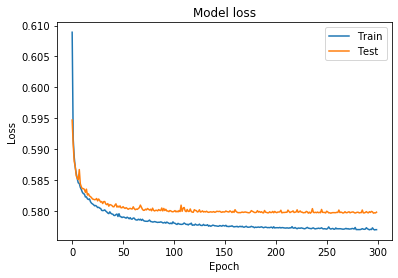

In [13]:
plot_hist(history, "plot_base_t_deeper")

In [14]:
_, _, x_predict = prep.obtain_dataset(images_list, data_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


1/1 [==============================] - 0s 38ms/step


0.5939814448356628

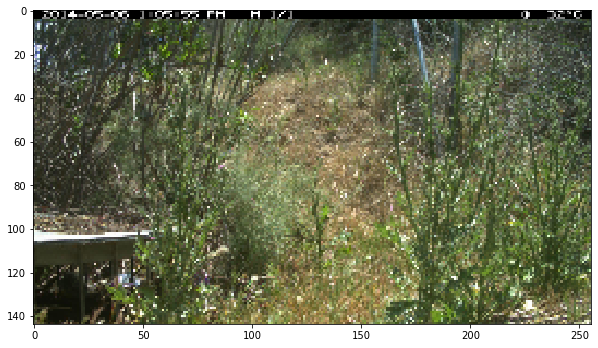

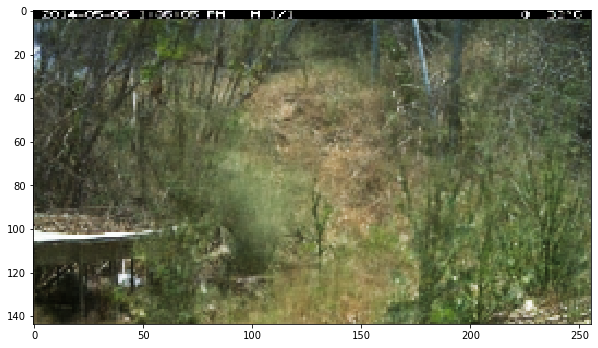

In [34]:
image = random.choice(x_test)
decoded_img = model.predict(np.array([image]))
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.figure(figsize=(10, 10))
plt.imshow(decoded_img[0])
model.evaluate(x = np.array([image]), y = np.array([image]))

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import random
from multiprocessing import Pool
from preprocessing import pre_process_images
import numpy as np

In [3]:
data_path = "data\locations\96"

def process_images(all_paths):
    pool = Pool(8)

    processed_array = np.array(pool.map(pre_process_images, all_paths), dtype=np.float32)

    pool.close()
    pool.join()

    return processed_array

all_paths = []
for img in os.listdir(os.path.join(data_path, "animals")):
    all_paths.append(os.path.join(data_path, "animals", img))

len_all_paths = len(all_paths)

empty_paths = []
for img in os.listdir(data_path):
    if not os.path.isdir(os.path.join(data_path, img)):
        empty_paths.append(os.path.join(data_path, img))

all_paths.extend(empty_paths[0:len_all_paths])
random.shuffle(all_paths)

In [5]:
processed_array = process_images(all_paths)

In [11]:
import matplotlib.pyplot as plt
import cv2

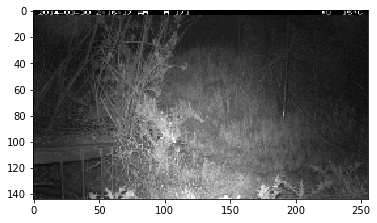

In [19]:
plt.imshow(processed_array[1])

In [25]:
tags = []
for path in all_paths:
    if len(path.split('\\')) == 5:
        tags.append(1)
    else:
        tags.append(0)

In [27]:
labeled_data = zip(processed_array, tags)

In [28]:
np.save("predict_photos/labeled_data", labeled_data)

In [31]:
np.load("predict_photos/labeled_data.npy", allow_pickle=True)

array(<zip object at 0x000002AC31C05808>, dtype=object)

In [32]:
from deeper_autoencoder import load_autoencoder

Using TensorFlow backend.


In [33]:
model = load_autoencoder(("model/autoencoder_base_t_deeper"), ("model/autoencoder_base_t_deeper_w"))

Loaded model from disk


In [34]:
prediction = model.predict(processed_array)

In [42]:
from photo_diff import photo_diff
import pandas as pd

In [44]:
data = []
for in_img, out_img, tag in zip(processed_array, prediction, tags):
    mse, score = photo_diff(in_img, out_img)
    #print(f"Image difference: Average error: {mse} || SSIM: {score * 100:.2f}% || Animal: {tag}")
    data.append((mse, score, tag))
    

In [45]:
dataframe = pd.DataFrame(data = data, columns=['MSE', 'SSIM', 'Tag'])

In [46]:
dataframe.head()

MSE      SSIM  Tag
0   82.619520  0.536839    0
1   55.984104  0.546823    1
2   83.512180  0.487893    0
3  103.570692  0.584921    1
4   81.237901  0.546985    0

Tag
0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

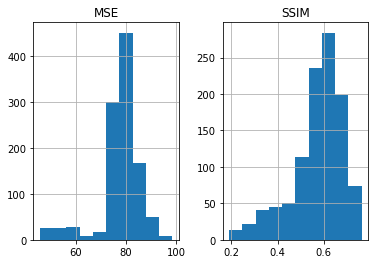

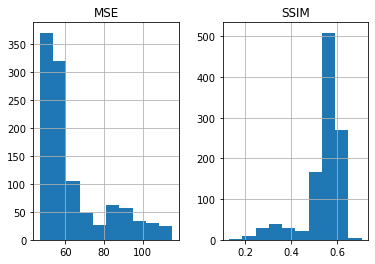

In [58]:
dataframe.groupby('Tag').hist()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
dataframe = pd.read_csv("predict_photos/dataframe.csv")

Tag
0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

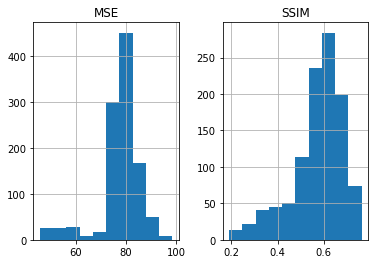

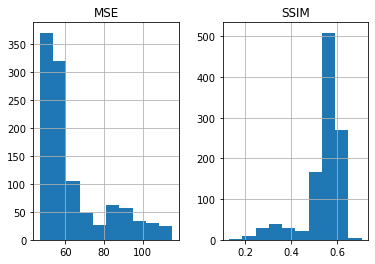

In [3]:
dataframe.groupby('Tag').hist()

In [15]:
dataframe.groupby('Tag').mean()

MSE      SSIM
Tag                     
0    77.638729  0.573030
1    64.022224  0.542373

In [16]:
dataframe.groupby('Tag').std()

MSE      SSIM
Tag                     
0     8.223907  0.110506
1    16.680817  0.084642

In [14]:
dataframe.groupby('Tag').count()

MSE  SSIM
Tag            
0    1078  1078
1    1078  1078

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as prep
import datetime

In [2]:
import random

In [3]:
def plot_hist(history, filename):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.savefig("media/{}.pdf".format(filename))
    plt.show()

In [4]:
def plot_imgs(originals, predictions):    
    n = 5
    fig, ax = plt.subplots(2, n)
    for i in range(n):
        # display original
        # ax[0].set_title("Original Images")
        ax[0, i].imshow(originals[i])
        ax[0, i].get_xaxis().set_visible(False)
        ax[0, i].get_yaxis().set_visible(False)

        # display reconstruction
        # ax[1].set_title("Reconstructed Images")
        ax[1, i].imshow(predictions[i])
        ax[1, i].get_xaxis().set_visible(False)
        ax[1, i].get_yaxis().set_visible(False)


    plt.tight_layout()
    plt.show()

In [5]:
data_path = "data/locations/experiments_set" 
images_list = os.listdir(data_path)
downscaling_factor = 8

In [6]:
x_train, x_test, _ = prep.obtain_dataset(images_list, data_path)

No serialized data found, lets pre process it and serialize it
Processing 3000 images
Finished serializing serialized/experiments_set/x_train.npy
Finished processing x_train
Finished serializing serialized/experiments_set/x_test.npy
Finished processing x_test
Finished serializing serialized/experiments_set/x_predict.npy
Finished processing x_predict


In [7]:
import deeper_autoencoder_trans_seven as d_cae_t7
print(x_train[0].shape)
model = d_cae_t7.build_autoencoder(x_train[0].shape)
model.summary()

Using TensorFlow backend.


(144, 256, 3)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 256, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 128, 256)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 128, 128)      295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 32, 6

In [8]:
epochs = 300
history = model.fit(x_train, x_train,
            epochs=epochs,
            batch_size=8,
            shuffle=True,
            validation_data=(x_test, x_test),
            verbose=2)

Train on 1800 samples, validate on 600 samples
Epoch 1/300
 - 252s - loss: 0.0212 - val_loss: 0.0158
Epoch 2/300
 - 247s - loss: 0.0151 - val_loss: 0.0140
Epoch 3/300
 - 247s - loss: 0.0137 - val_loss: 0.0134
Epoch 4/300
 - 246s - loss: 0.0129 - val_loss: 0.0126
Epoch 5/300
 - 247s - loss: 0.0124 - val_loss: 0.0121
Epoch 6/300
 - 247s - loss: 0.0119 - val_loss: 0.0118
Epoch 7/300
 - 247s - loss: 0.0116 - val_loss: 0.0119
Epoch 8/300
 - 247s - loss: 0.0114 - val_loss: 0.0116
Epoch 9/300
 - 247s - loss: 0.0111 - val_loss: 0.0111
Epoch 10/300
 - 247s - loss: 0.0110 - val_loss: 0.0109
Epoch 11/300
 - 246s - loss: 0.0108 - val_loss: 0.0110
Epoch 12/300
 - 247s - loss: 0.0107 - val_loss: 0.0110
Epoch 13/300
 - 246s - loss: 0.0105 - val_loss: 0.0107
Epoch 14/300
 - 246s - loss: 0.0104 - val_loss: 0.0106
Epoch 15/300
 - 246s - loss: 0.0103 - val_loss: 0.0106
Epoch 16/300
 - 244s - loss: 0.0103 - val_loss: 0.0104
Epoch 17/300
 - 242s - loss: 0.0100 - val_loss: 0.0104
Epoch 18/300
 - 242s - loss

In [21]:
d_cae_t7.save_autoencoder(model, "model/autoencoder_mse", "model/autoencoder_mse_w")

Saved model to disk


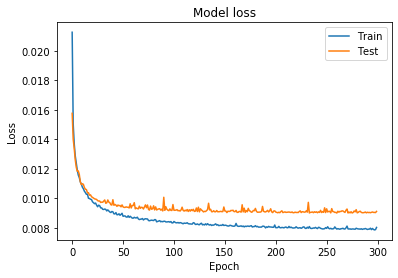

In [10]:
plot_hist(history, "plot_ae_mse")

In [11]:
_, _, x_predict = prep.obtain_dataset(images_list, data_path)

Preprocessed images loaded from disk
No preprocessing needed, we got serialized data


1/1 [==============================] - 0s 50ms/step


0.009588026441633701

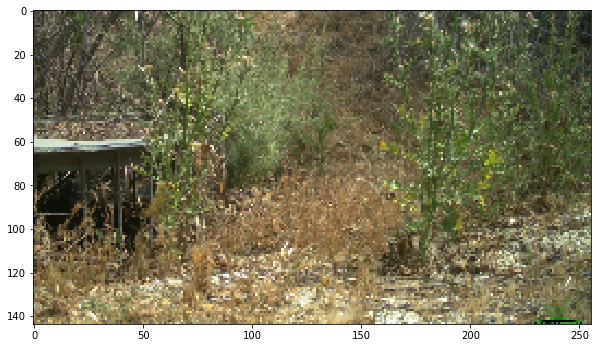

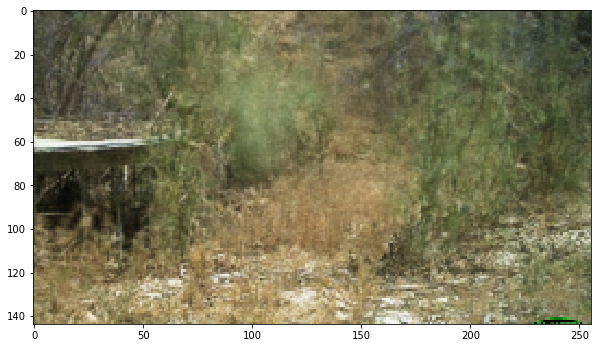

In [20]:
image = random.choice(x_test)
decoded_img = model.predict(np.array([image]))
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.figure(figsize=(10, 10))
plt.imshow(decoded_img[0])
model.evaluate(x = np.array([image]), y = np.array([image]))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from photo_diff import photo_diff

In [2]:
from deeper_autoencoder_trans_seven import load_autoencoder

model = load_autoencoder(("model/autoencoder_mse"), ("model/autoencoder_mse_w"))

Using TensorFlow backend.


Loaded model from disk


In [3]:
labeled_data = np.load("predict_photos/labeled_array.npy", allow_pickle=True)

In [4]:
processed_images = np.array([x[0] for x in labeled_data])

In [5]:
prediction = model.predict(processed_images)

In [6]:
data = []
for in_img, out_img, tag in zip(processed_images, prediction, [x[1] for x in labeled_data]):
    mse, score = photo_diff(in_img, out_img)
    #print(f"Image difference: Average error: {mse} || SSIM: {score * 100:.2f}% || Animal: {tag}")
    data.append((mse, score, tag))
    

In [7]:
df = pd.DataFrame(data, columns=['MSE', 'SSIM', 'Tag'])

In [8]:
df.head()

MSE      SSIM  Tag
0   63.655816  0.475905    1
1  105.411323  0.425268    1
2   79.244656  0.434297    1
3   63.775987  0.469685    1
4   90.701552  0.314286    1

In [9]:
df.groupby('Tag').mean()

MSE      SSIM
Tag                     
0    84.208454  0.550575
1    75.205405  0.425962

Tag
0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

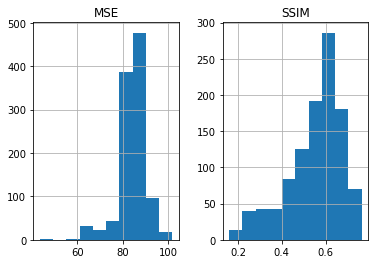

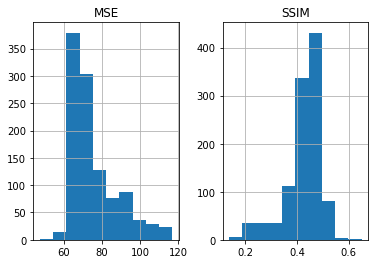

In [10]:
df.groupby('Tag').hist()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from photo_diff import photo_diff

In [2]:
from deeper_autoencoder_trans_seven import load_autoencoder

model = load_autoencoder(("model/autoencoder_mse"), ("model/autoencoder_mse_w"))

Using TensorFlow backend.


Loaded model from disk


In [3]:
labeled_data = np.load("predict_photos/labeled_array.npy", allow_pickle=True)

In [4]:
processed_images = np.array([x[0] for x in labeled_data])

In [5]:
prediction = model.predict(processed_images)

KeyboardInterrupt: 

In [ ]:
data = []
for in_img, out_img, tag in zip(processed_images, prediction, [x[1] for x in labeled_data]):
    mse, score = photo_diff(in_img, out_img)
    #print(f"Image difference: Average error: {mse} || SSIM: {score * 100:.2f}% || Animal: {tag}")
    data.append((mse, score, tag))
    

In [ ]:
df = pd.DataFrame(data, columns=['MSE', 'SSIM', 'Tag'])

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.groupby('Tag').mean()

In [ ]:
df.groupby('Tag').hist()

In [ ]:
scaled_df = df

In [ ]:
scaled_df.SSIM = scaled_df.SSIM * 100

In [ ]:
scaled_df.boxplot(by='Tag', figsize=(15, 10), grid=False)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [16]:
treeClasifier = DecisionTreeClassifier()

In [30]:
feature_cols = ['MSE', 'SSIM']
X = df[feature_cols]
y = df['Tag']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [40]:
treeClasifier = treeClasifier.fit(X, y)

In [41]:
y_pred = treeClasifier.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [51]:
treeClasifier.score(X_test, y_test)

1.0

In [66]:
dot_data = export_graphviz(treeClasifier, out_file=None,feature_names=feature_cols,class_names=True)
f = open("classifier.txt","w+")
f.write(dot_data)
f.close()

In [99]:
treeClasifier = DecisionTreeClassifier(max_depth=7)

In [100]:
feature_cols = ['MSE', 'SSIM']
X = df[feature_cols]
y = df['Tag']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [102]:
treeClasifier = treeClasifier.fit(X, y)

In [103]:
y_pred = treeClasifier.predict(X_test)

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9211746522411128


In [105]:
treeClasifier.score(X_test, y_test)

0.9211746522411128

In [106]:
dot_data = export_graphviz(treeClasifier, out_file=None,feature_names=feature_cols,class_names=True)
f = open("classifier.txt","w+")
f.write(dot_data)
f.close()

In [24]:
import pickle
filename = 'model/decision_tree.sav'
pickle.dump(treeClasifier, open(filename, 'wb'))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("predict_photos/dataframe.csv")

In [3]:
df.SSIM = df.SSIM * 100

In [19]:
empty_imgs = df[df.Tag == 0]

In [20]:
animals = df[df.Tag == 1]

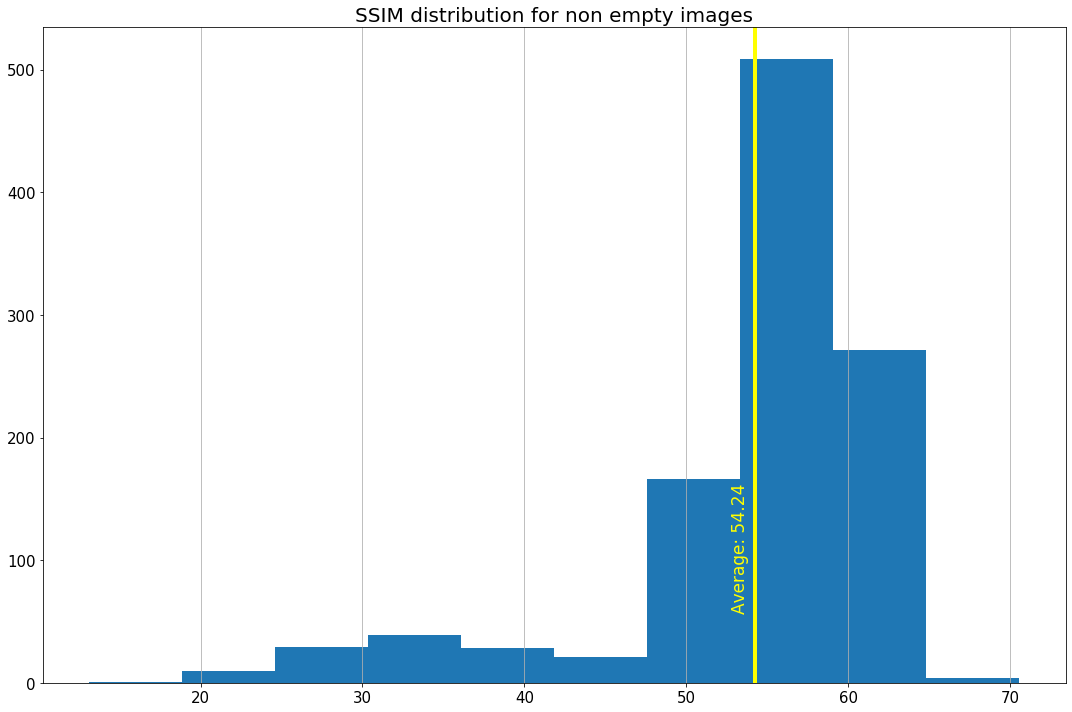

In [84]:
plt.figure(figsize=(15, 10))
plt.hist(animals.SSIM)
plt.grid(axis='x')
plt.title('SSIM distribution for non empty images', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(np.average(animals.SSIM), 0, color='yellow', linewidth=4)
plt.text(np.average(animals.SSIM) - 1.5, 60, 
         f"Average: {np.average(animals.SSIM):.2f}", 
         rotation=90, 
         color='yellow', 
         fontsize=17)

plt.savefig("media/misc_plots/ssim_hist_non_empty.pdf")
plt.tight_layout()
plt.show()

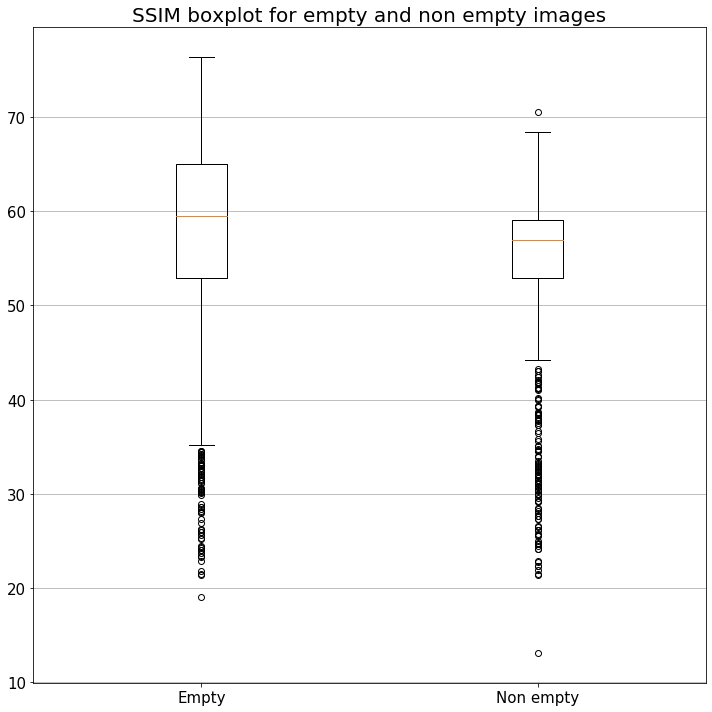

In [106]:
data = [empty_imgs.SSIM, animals.SSIM]

plt.figure(figsize=(10, 10))
plt.boxplot(data, vert=True, labels=['Empty', 'Non empty'])
plt.grid(axis='y', which='major')
plt.title('SSIM boxplot for empty and non empty images', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.axhline(np.average(data), 0, color='yellow', linewidth=4)
#plt.text(np.average(data) - 1.5, 60,  f"Average: {np.average(data):.2f}",  rotation=90,  color='yellow',  fontsize=17)

plt.savefig("media/misc_plots/ssim_boxplot_both.pdf")
plt.tight_layout()
plt.show()

In [107]:
df

MSE       SSIM  Tag
0      82.619520  53.683916    0
1      55.984104  54.682266    1
2      83.512180  48.789339    0
3     103.570692  58.492090    1
4      81.237901  54.698540    0
...          ...        ...  ...
2151   73.683350  74.759368    0
2152   80.118571  60.985520    1
2153   57.925971  51.670788    1
2154  103.334608  57.945086    1
2155   72.137831  64.418359    1

[2156 rows x 3 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020759B5FA08>,
      dtype=object)

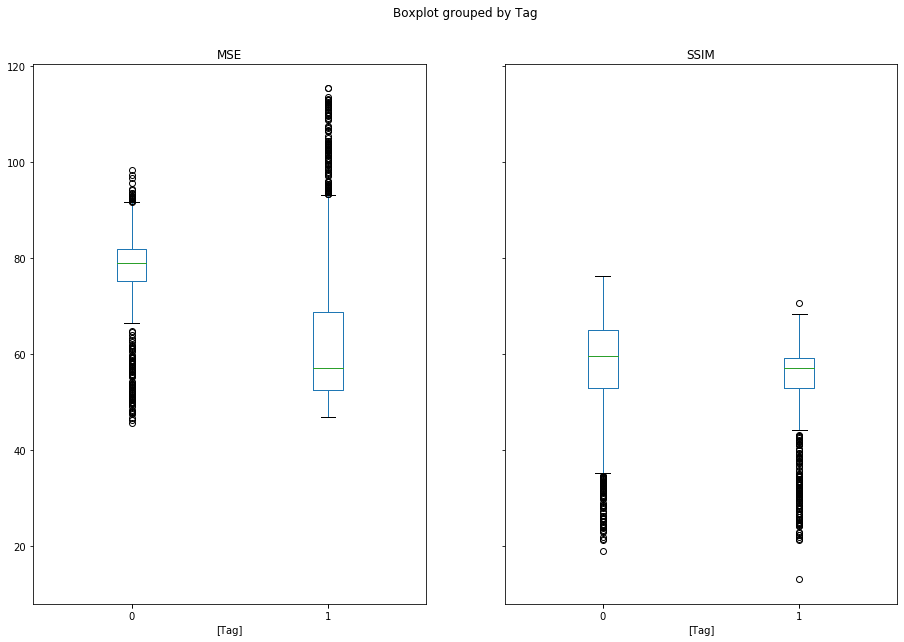

In [12]:
df.boxplot(by='Tag', figsize=(15, 10), grid=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("predict_photos/dataframe.csv")

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
treeClasifier = DecisionTreeClassifier(max_depth=5)

In [20]:
feature_cols = ['MSE', 'SSIM']
X = df[feature_cols]
y = df['Tag']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [22]:
treeClasifier = treeClasifier.fit(X_train, y_train)

In [23]:
treeClasifier.score(X_test, y_test)

0.9057187017001546

# BACKGROUND SUBTRACTION

In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

In [47]:
#backSubKNN = cv.createBackgroundSubtractorKNN(dist2Threshold=100)
backSubMOG2 = cv.createBackgroundSubtractorMOG2(detectShadows=False, varThreshold=50)

In [2]:
bg = cv.imread("predict_photos/empty_night.jpg")

In [3]:
img = cv.imread("predict_photos/rabbit_night.jpg")

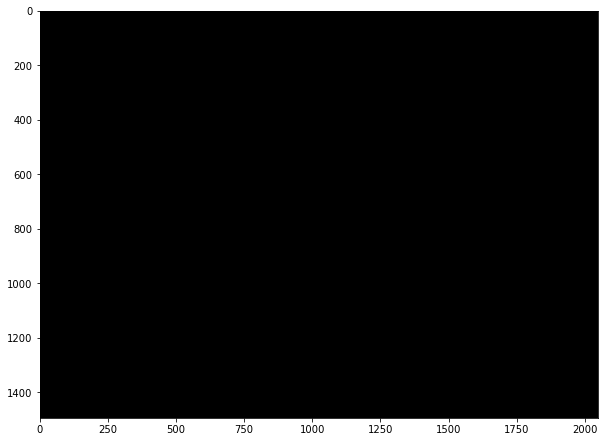

In [50]:
for i in range(10):
   backSubMOG2.apply(bg) 

plt.imshow(backSubMOG2.apply(bg))

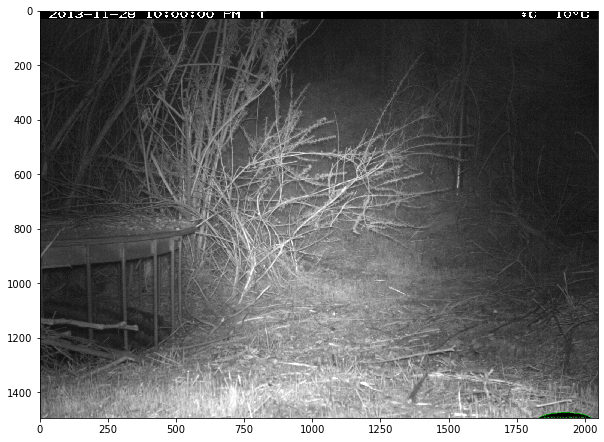

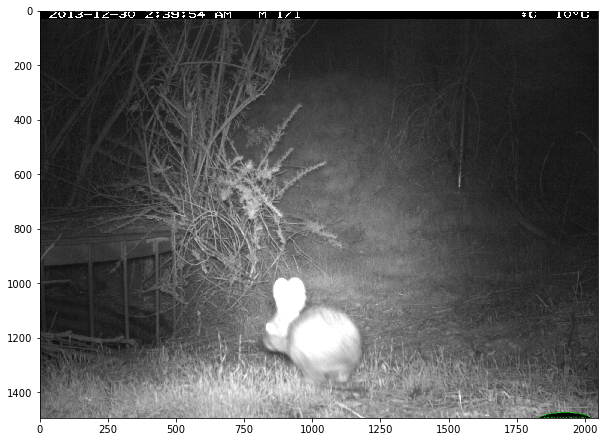

In [51]:
plt.figure()
plt.imshow(backSubMOG2.getBackgroundImage())
plt.figure()
plt.imshow(img)

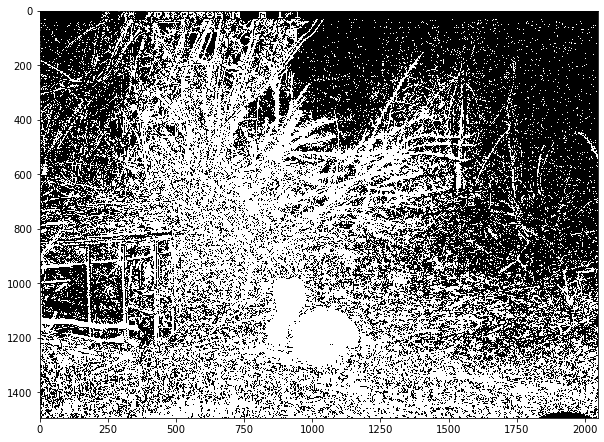

In [52]:
plt.imshow(backSubMOG2.apply(img))

In [3]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

In [70]:
# https://theailearner.com/2019/07/19/balanced-histogram-thresholding/
def balanced_hist_thresholding(b):
    # Starting point of histogram
    i_s = np.min(np.where(b[0]>0))
    # End point of histogram
    i_e = np.max(np.where(b[0]>0))
    # Center of histogram
    i_m = (i_s + i_e)//2
    # Left side weight
    w_l = np.sum(b[0][0:i_m+1])
    # Right side weight
    w_r = np.sum(b[0][i_m+1:i_e+1])
    # Until starting point not equal to endpoint
    while (i_s != i_e):
        # If right side is heavier
        if (w_r > w_l):
            # Remove the end weight
            w_r -= b[0][i_e]
            i_e -= 1
            # Adjust the center position and recompute the weights
            if ((i_s+i_e)//2) < i_m:
                w_l -= b[0][i_m]
                w_r += b[0][i_m]
                i_m -= 1
        else:
            # If left side is heavier, remove the starting weight
            w_l -= b[0][i_s]
            i_s += 1
            # Adjust the center position and recompute the weights
            if ((i_s+i_e)//2) >= i_m:
                w_l += b[0][i_m+1]
                w_r -= b[0][i_m+1]
                i_m += 1
    return i_m

In [71]:
def bht(hist, min_count: int = 5) -> int:
    """Balanced histogram thresholding."""
    n_bins = len(hist)  # assumes 1D histogram
    h_s = 0
    while hist[h_s] < min_count:
        h_s += 1  # ignore small counts at start
    h_e = n_bins - 1
    while hist[h_e] < min_count:
        h_e -= 1  # ignore small counts at end
    # use mean intensity of histogram as center; alternatively: (h_s + h_e) / 2)
    h_c = int(round(np.average(np.linspace(0, 2 ** 8 - 1, n_bins), weights=hist)))
    w_l = np.sum(hist[h_s:h_c])  # weight in the left part
    w_r = np.sum(hist[h_c : h_e + 1])  # weight in the right part

    while h_s < h_e:
        if w_l > w_r:  # left part became heavier
            w_l -= hist[h_s]
            h_s += 1
        else:  # right part became heavier
            w_r -= hist[h_e]
            h_e -= 1
        new_c = int(round((h_e + h_s) / 2))  # re-center the weighing scale

        if new_c < h_c:  # move bin to the other side
            w_l -= hist[h_c]
            w_r += hist[h_c]
        elif new_c > h_c:
            w_l += hist[h_c]
            w_r -= hist[h_c]

        h_c = new_c

    return h_c

In [72]:
rabbit = cv.imread("predict_photos/rabbit_night.jpg", 0)

In [4]:
cat = cv.imread("predict_photos/cat_night.jpg", 0)

In [46]:
empty = cv.imread("predict_photos/empty_night.jpg", 0)

In [73]:
plt.imsave("predict_photos/threshold/rabbit.pdf", rabbit)

In [74]:
thresh, _ = cv.threshold(rabbit ,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

In [75]:
thresh

95.0

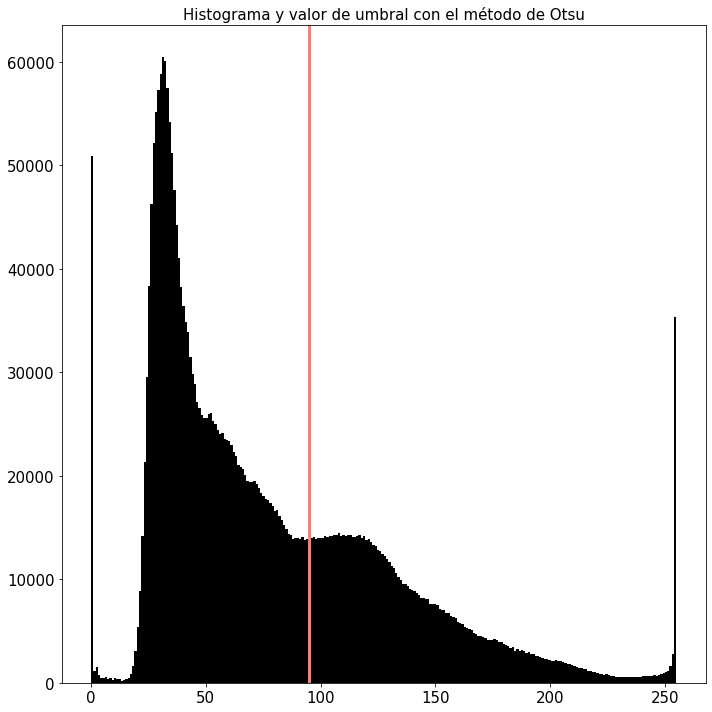

In [36]:
plt.hist(rabbit.ravel(),256, color='black')
plt.axvline(thresh, color='salmon', linewidth=3)
plt.title('Histograma y valor de umbral con el método de Otsu', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("predict_photos/threshold/hist_otsu.pdf")


In [33]:
balanced_thresh = balanced_hist_thresholding(hist)

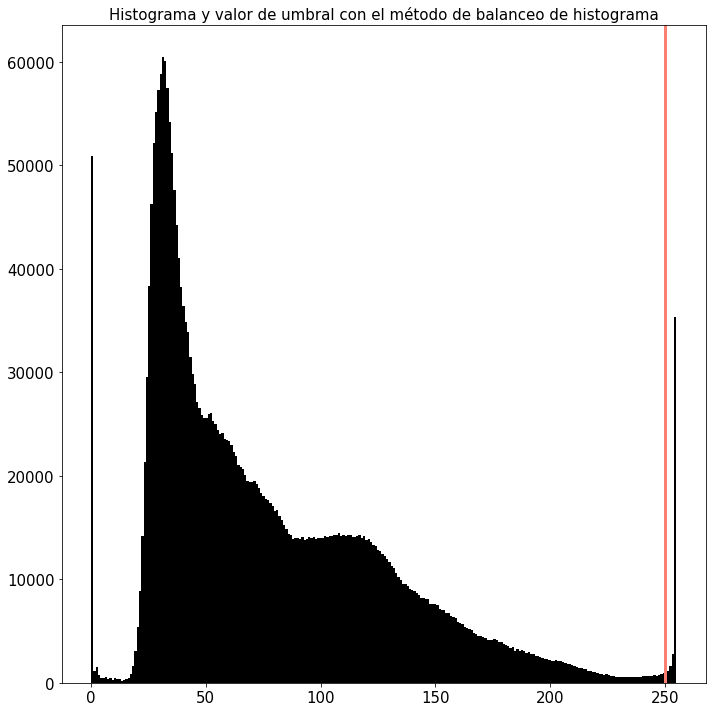

In [37]:
plt.hist(rabbit.ravel(),256, color='black')
plt.axvline(balanced_thresh, color='salmon', linewidth=3)
plt.title('Histograma y valor de umbral con el método de balanceo de histograma', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("predict_photos/threshold/hist_BHT.pdf")

In [14]:
_, thresh_img = cv.threshold(rabbit, threshold, 255, 0)

In [15]:
plt.imsave("predict_photos/threshold/rabbit_bht.pdf", thresh_img)

In [12]:
eq_img = cv.equalizeHist(rabbit)

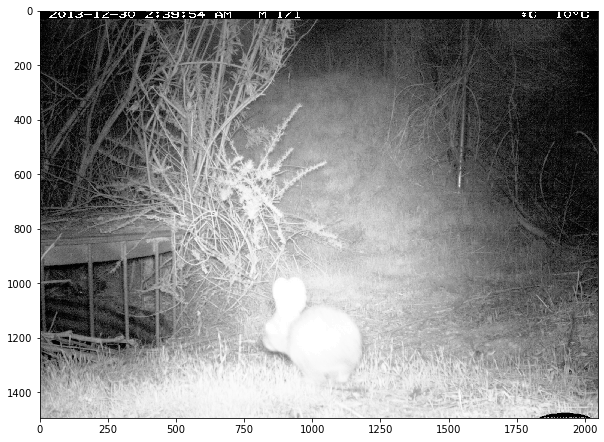

In [13]:
plt.imshow(eq_img)

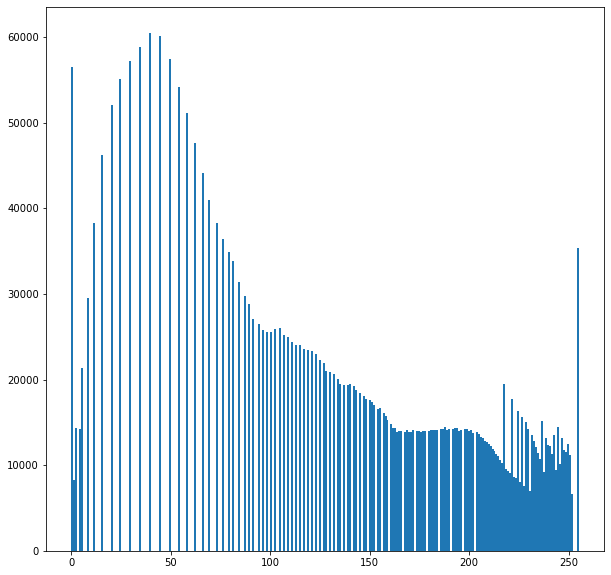

In [14]:
eq_hist = plt.hist(eq_img.ravel(), 256)

In [15]:
eq_thresh = balanced_hist_thresholding(eq_hist)

In [16]:
eq_thresh

255

In [17]:
_, eq_thresh_img = cv.threshold(rabbit, eq_thresh, 255, 0)

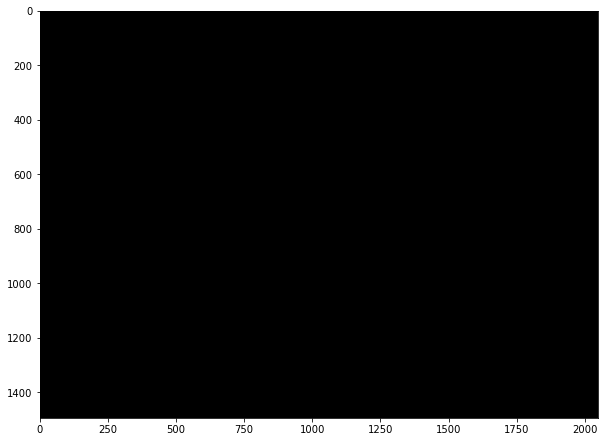

In [18]:
plt.imshow(eq_thresh_img)

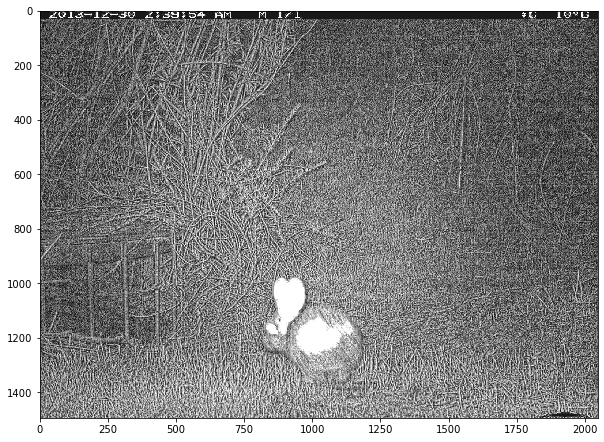

In [86]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(512, 512))

clahe_img = clahe.apply(rabbit)

plt.imshow(clahe_img)
plt.imsave("predict_photos/threshold/rabbit_CLAHE.pdf", clahe_img)

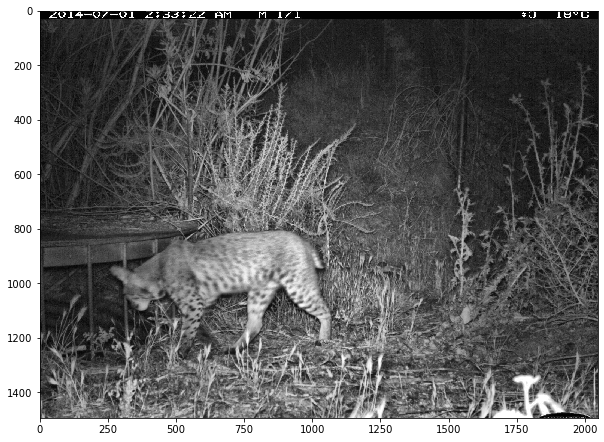

In [13]:
size=16
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(size, size))

clahe_img = clahe.apply(cat)

plt.imshow(clahe_img)
plt.imsave(f"predict_photos/threshold/cat_CLAHE_{size}.pdf", clahe_img)

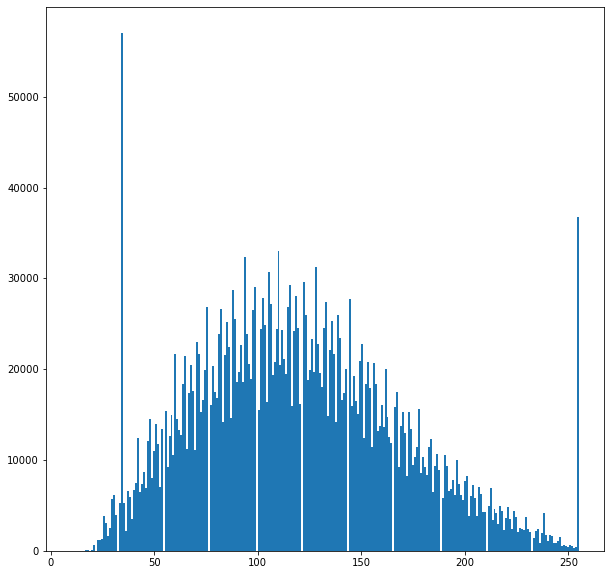

In [77]:
clahe_hist = plt.hist(clahe_img.ravel(), 256)

In [78]:
value, clahe_thresh_img = cv.threshold(clahe_img,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

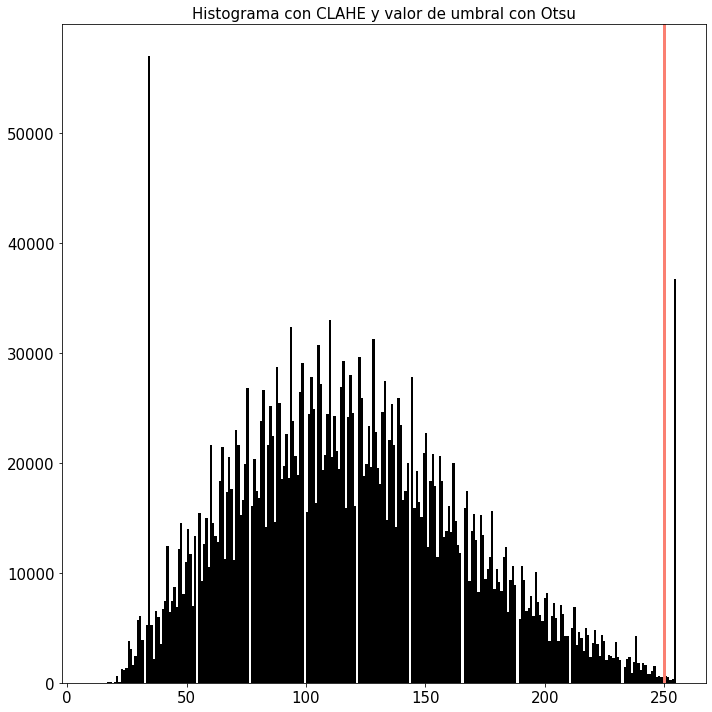

In [80]:
plt.hist(clahe_img.ravel() ,256, color='black')
plt.axvline(balanced_thresh, color='salmon', linewidth=3)
plt.title('Histograma con CLAHE y valor de umbral con Otsu', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("predict_photos/threshold/hist_CLAHE.pdf")

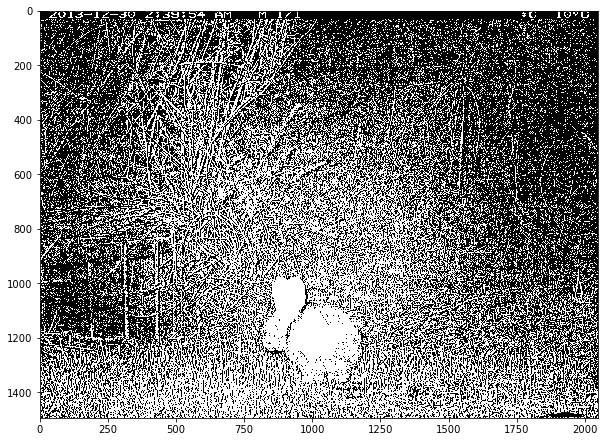

In [85]:
plt.imshow(clahe_thresh_img)
plt.imsave("predict_photos/threshold/rabbit_CLAHE_Otsu.pdf", clahe_thresh_img)

In [38]:
def create_element(size=3):
    return cv.getStructuringElement(cv.MORPH_ELLIPSE, 
                (2 * size + 1, 2 * size + 1),
                (size,size))

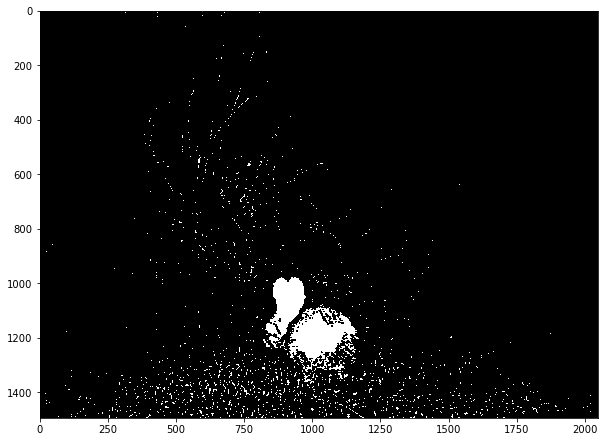

In [88]:
opened = cv.morphologyEx(clahe_thresh_img, cv.MORPH_ERODE, create_element(3), iterations=1)
plt.imshow(opened)
plt.imsave("predict_photos/threshold/rabbit_eroded_1.pdf", opened)

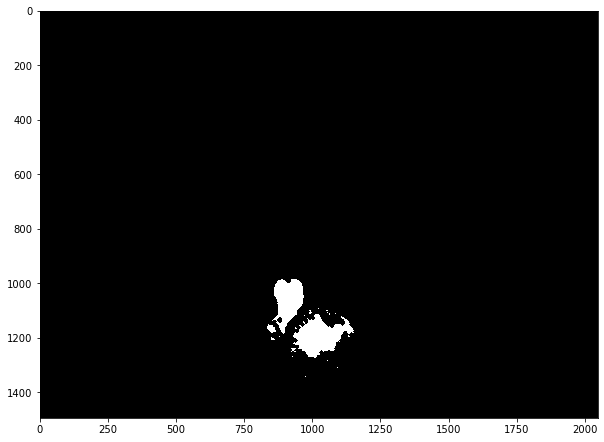

In [89]:
opened = cv.morphologyEx(opened, cv.MORPH_ERODE, create_element(1), iterations=5)
plt.imshow(opened)
plt.imsave("predict_photos/threshold/rabbit_eroded_2.pdf", opened)

In [1]:
def create_element(size=3):
    return cv.getStructuringElement(cv.MORPH_ELLIPSE, 
                (2 * size + 1, 2 * size + 1),
                (size,size))

def binary_inference(arr, diff_threshold=20, clahe=None, return_img=False):
     #more than 20% of the image is white, so we say there's an animal
    
    if clahe is None:
        clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(128, 128))
    
    clahe_arr = clahe.apply(arr)
    
    _, clahe_thresh_arr = cv.threshold(clahe_arr, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    eroded_arr = cv.morphologyEx(clahe_thresh_arr, cv.MORPH_ERODE, create_element(3), iterations=1)
    eroded_arr = cv.morphologyEx(eroded_arr, cv.MORPH_ERODE, create_element(1), iterations=5)
    
    dilated_arr = cv.morphologyEx(eroded_arr, cv.MORPH_DILATE, create_element(3), iterations=5)
    
    decision = None
    if (np.count_nonzero(dilated_arr) / len(arr.ravel()) * 100) < diff_threshold:
        decision = False
    else:
        decision = True
    
    if return_img: 
        return (decision, dilated_arr)
    else:
        return decision

In [6]:
data_path = "data\locations\96"

tags = []
all_paths = []

for path in os.listdir(os.path.join(data_path, 'animals')):
    all_paths.append(os.path.join(data_path, 'animals', path))

animals_size = len(all_paths)

for path in os.listdir(data_path)[:animals_size]:
    all_paths.append(os.path.join(data_path, path))
    
for path in all_paths:
    if len(path.split('\\')) == 5:
        tags.append(True)
    else:
        tags.append(False)
        
img_array = [cv.imread(path, 0) for path in all_paths]

In [7]:
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(128, 128))

In [11]:
import seaborn as sn
def save_heatmap(matrix, thresh):
    heatmap = None
    figure = None
    heatmap = sn.heatmap(matrix, annot=True, fmt='d', cbar=False, annot_kws={"size": 20})
    heatmap.title.set_text(f"Matriz de confusión para umbral {thresh}%")
    heatmap.title.set_fontsize(15)
    heatmap.set_xlabel('Predicción', fontsize=15)
    heatmap.set_ylabel('Etiquetas', fontsize=15)
    
    plt.tight_layout()
    plt.savefig(f"predict_photos/threshold/results/heatmap_{thresh}.pdf")
    plt.clf()

In [12]:
from sklearn.metrics import confusion_matrix
thresholds = [10, 15, 20, 25, 30]
global_results = dict()

for threshold in tqdm(thresholds):
    results = []
    for img, tag in zip(img_array, tags):
        decision = binary_inference(img, diff_threshold=threshold, clahe=clahe)
        results.append(decision)
       
    save_heatmap(confusion_matrix(tags, results), threshold)
    aciertos = [x[0] == x[1] for x in list(zip(tags, results))]
    global_results[threshold] = aciertos.copy()
    
    results.clear()
    aciertos.clear()
    



  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

 20%|████████████████▊                                                                   | 1/5 [01:06<04:27, 66.82s/it]

 40%|█████████████████████████████████▌                                                  | 2/5 [02:13<03:20, 66.83s/it]

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [03:19<02:13, 66.57s/it]

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [04:24<01:06, 66.19s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:30<00:00, 66.14s/it]


<Figure size 720x720 with 0 Axes>

In [126]:
global_results.keys()


dict_keys([10, 15, 20, 25, 30])

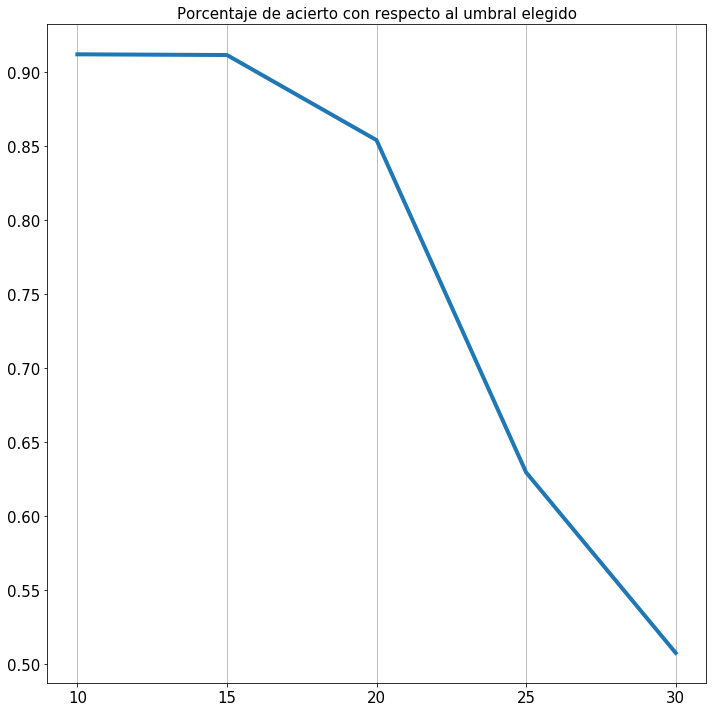

In [137]:
plt.plot(list(global_results.keys()), [np.count_nonzero(x)/len(tags) for x in global_results.values()], linewidth=4)
plt.grid(axis='x')
plt.title("Porcentaje de acierto con respecto al umbral elegido", fontsize=15)
plt.xticks(thresholds, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("predict_photos/threshold/results/plot_thresh_success.pdf")